Attributes

People ID: Customer's unique identifier                                                                                  Year_Birth: Customer's birth year                                                                                          Education: Customer's education level Marital_Status: Customer's marital status Income: Customer's yearly household income Kidhome: Number of children in customer's household Teenhome: Number of teenagers in customer's household Dt_Customer: Date of customer's enrollment with the company Recency: Number of days since customer's last purchase Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products MntWines: Amount spent on wine in last 2 years MntFruits: Amount spent on fruits in last 2 years MntMeatProducts: Amount spent on meat in last 2 years MntFishProducts: Amount spent on fish in last 2 years MntSweetProducts: Amount spent on sweets in last 2 years MntGoldProds: Amount spent on gold in last 2 years

Promotion NumDealsPurchases: Number of purchases made with a discount AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place NumWebPurchases: Number of purchases made through the company’s web site NumCatalogPurchases: Number of purchases made using a catalogue NumStorePurchases: Number of purchases made directly in stores NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import klib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\AnitaM\Downloads\Customer Personality Analysis\marketing_campaign.csv', sep='\t', engine='python')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


__________________________________

### Summary of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Income column contains null values

__________________

### Data Cleaning

Filling missing values in Income columns based on the mean income for each of the education level

In [4]:
data['Income'] = data.groupby('Education')['Income'].apply(lambda x: x.fillna(x.mean()))

In [5]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Null values in income column is updated with grouped mean value

Converting Dt_Customer to datatime type

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [8]:
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

The above two columns have a contant value; dropping Z_CostContact, Z_Revenue and ID

In [9]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

______________________

### Correlation among variables

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

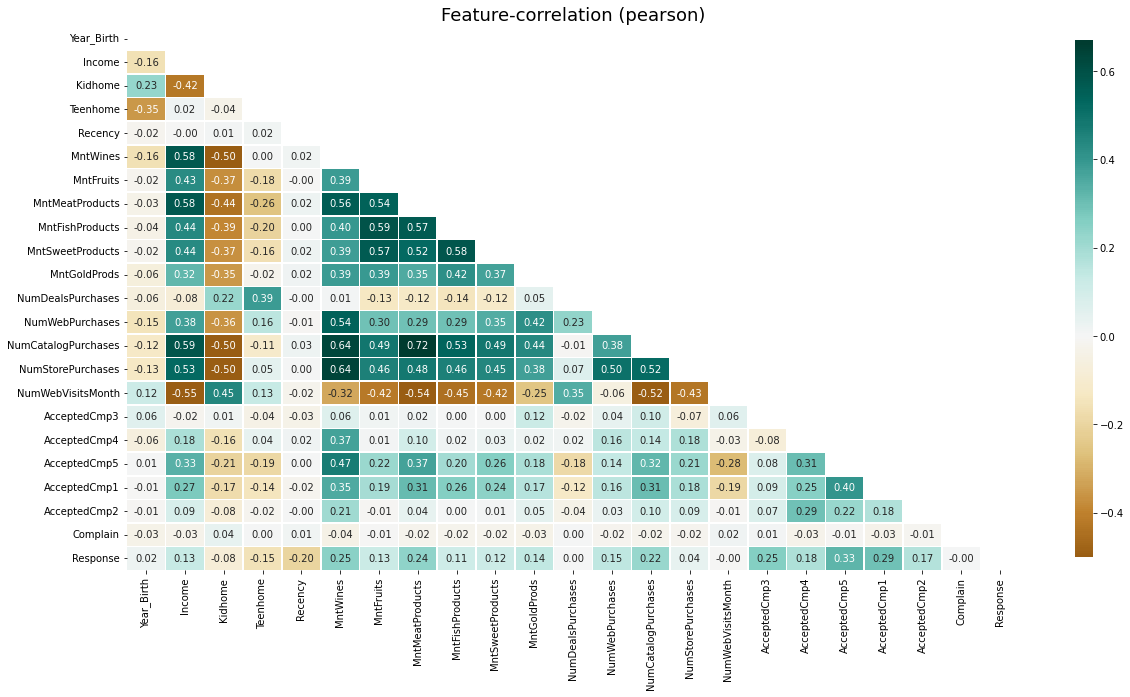

In [10]:
klib.corr_plot(data, figsize=[20,10])

From the above correlation matrix, a lot of variables seem to be correlated to each other. Income seems to be a lot correlated to mean amount spent on differnt products. Also the mean amount spent on different product seems to have a positive correlation with each other. The mean amount spent on wines has a high positive correlation with number of web purchases, catalog purchases and store purchases. The mean amount spent on meat products has a high positive correlation with number of catalog purchases. 

_________________

### Distribution plot of the variables

<AxesSubplot:xlabel='Response', ylabel='Density'>

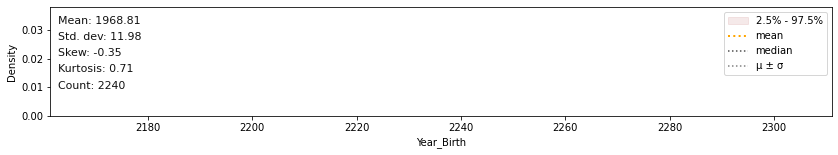

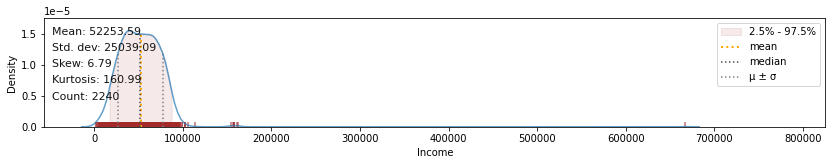

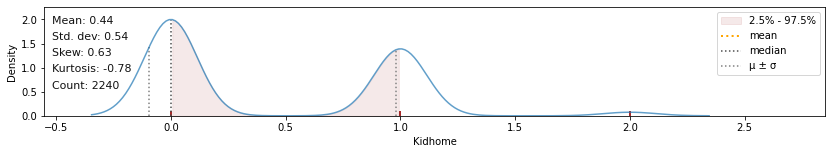

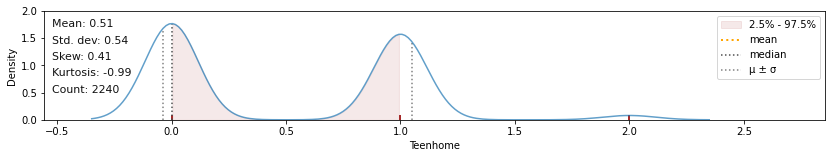

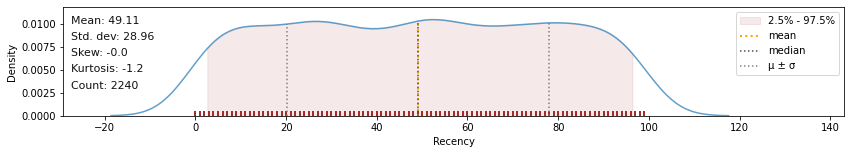

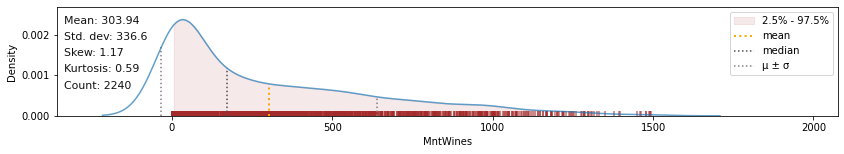

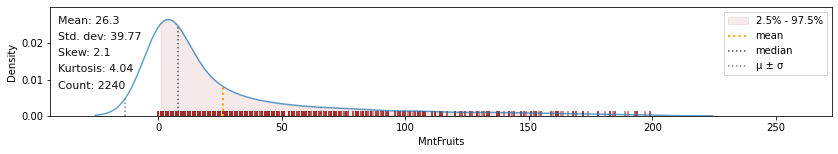

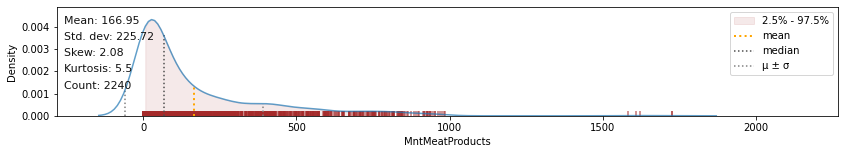

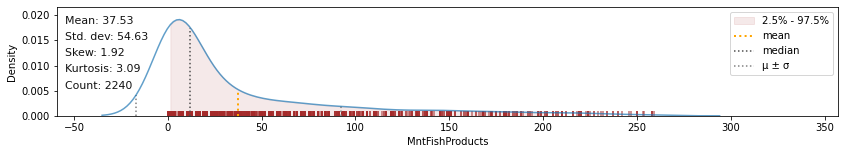

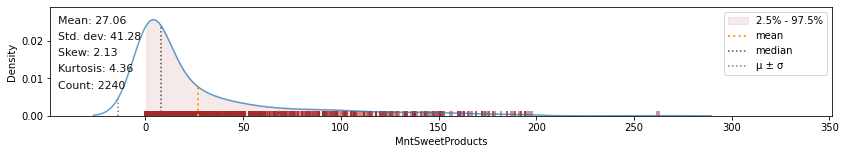

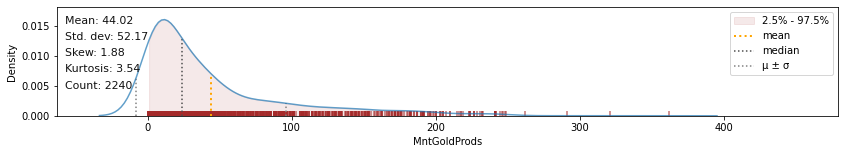

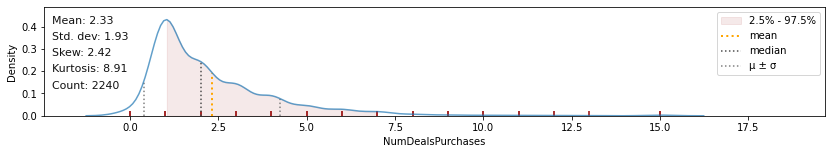

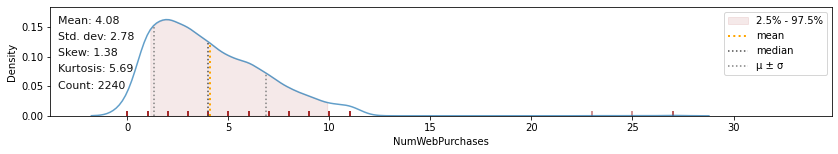

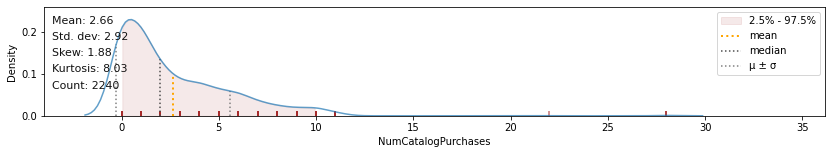

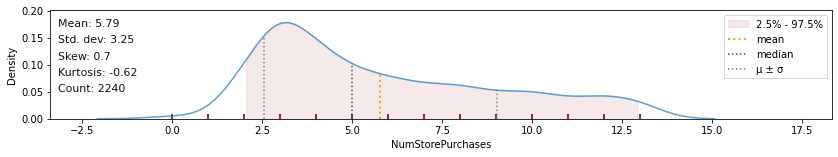

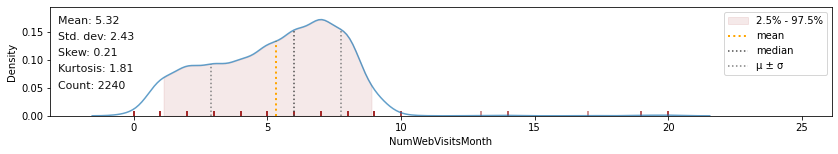

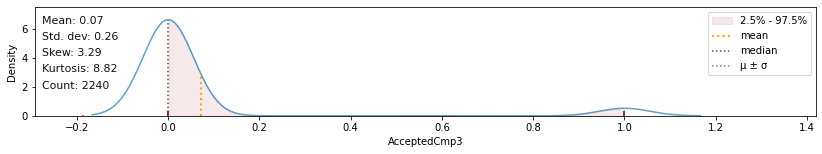

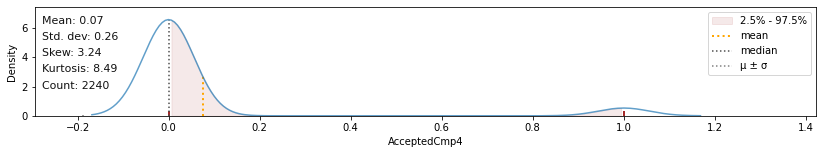

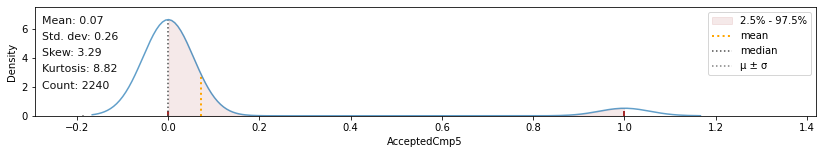

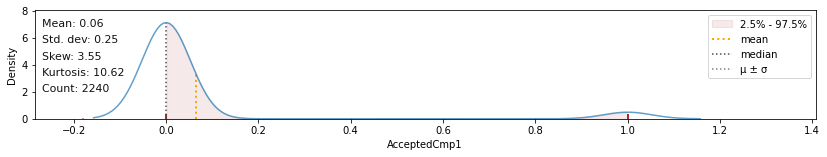

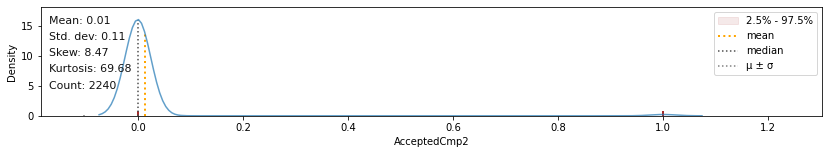

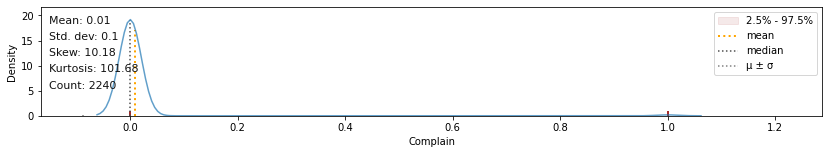

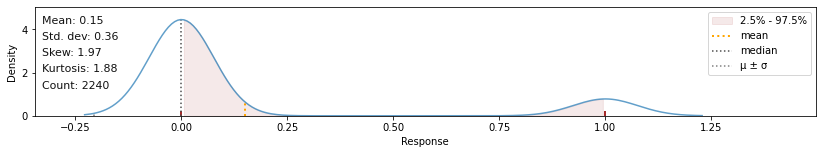

In [11]:
klib.dist_plot(data, showall=True)

The mean amount spent on the products, num of purchases through different ways have positively skewed distribution.

___________________

### Detecting Outliers

<AxesSubplot:title={'center':'Income'}, xlabel='Education'>

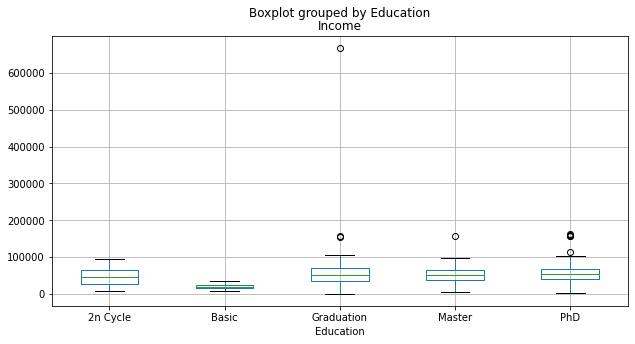

In [12]:
data.boxplot(by='Education', column=['Income'], figsize=[10,5])

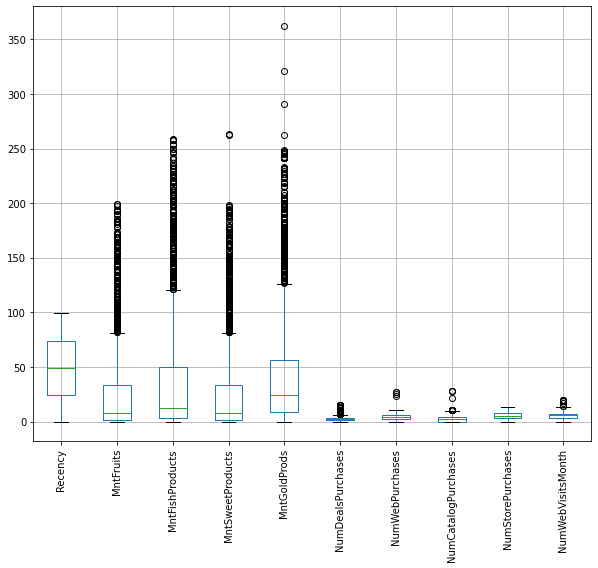

In [13]:
plt.figure(figsize=[10,8])
data[['Recency','MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].boxplot()
plt.xticks(rotation=90)
plt.show()

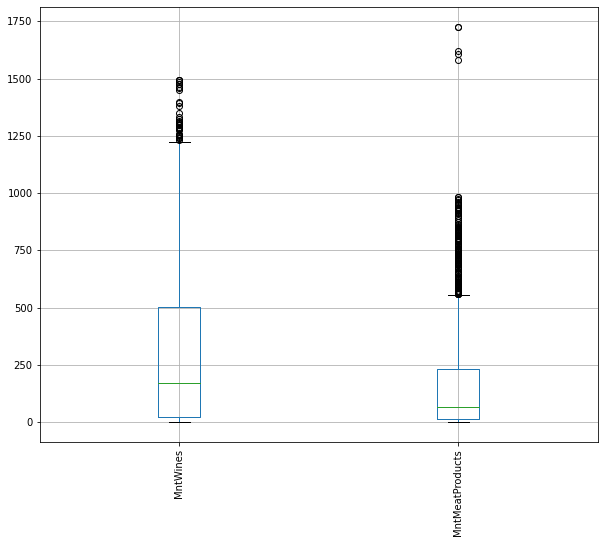

In [14]:
plt.figure(figsize=[10,8])
data[['MntWines', 'MntMeatProducts']].boxplot()
plt.xticks(rotation=90)
plt.show()

Outliers present for all of the above plotted variables

_____________________

### Calculating age of customer from year of birth 

In [15]:
from datetime import date
todays_date = date.today()

data['Customer_age'] = todays_date.year - data['Year_Birth']
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_age
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,4,7,0,0,0,0,0,0,1,64
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,5,0,0,0,0,0,0,0,67
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,56
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,4,6,0,0,0,0,0,0,0,37
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,40


In [16]:
print('Maximum age among the group : ', data['Customer_age'].max())
print('Minimum age among the group : ', data['Customer_age'].min())

Maximum age among the group :  128
Minimum age among the group :  25


In [17]:
data_age_above_100 = data[data['Customer_age']>=100]
data_age_above_100

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_age
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,2,5,0,0,0,0,0,1,0,121
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,2,4,0,0,0,0,0,0,0,128
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,4,1,0,0,1,0,0,0,0,122


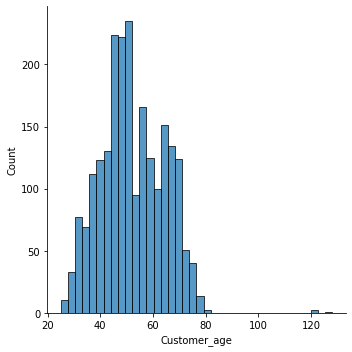

In [18]:
sns.displot(data['Customer_age'])

Most of the customers fall under age 40-50 but there are three customers who have age more than 100. Dropping these rows. 

In [19]:
data.drop(data[data['Customer_age']>100].index, axis=0, inplace=True)

_________________


### Relation between Education and Income

<AxesSubplot:xlabel='Income', ylabel='Education'>

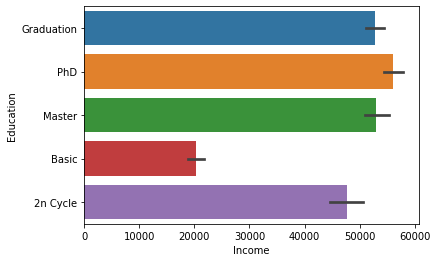

In [20]:
sns.barplot(x='Income', y='Education', data=data)

Customers with basic education have lowest income and PhD have highest income

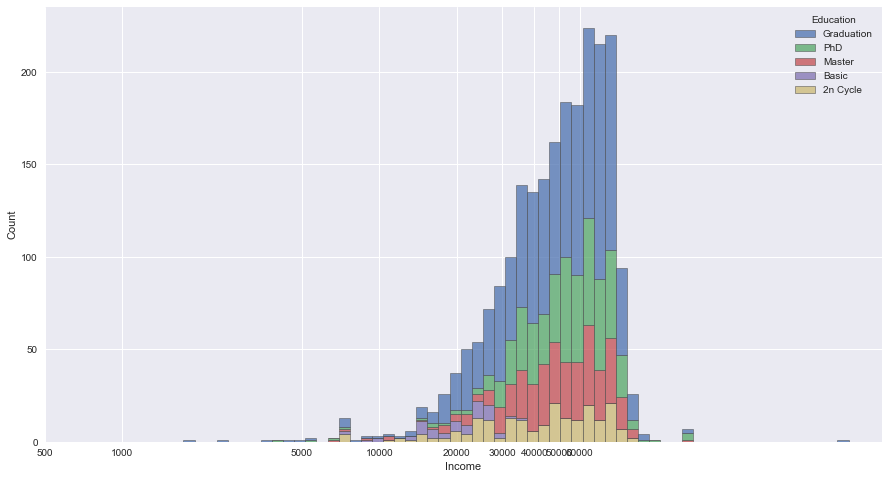

In [21]:
import matplotlib as mpl
plt.style.use("seaborn")

f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f)

sns.histplot(
    data,
    x='Income', hue='Education',
    multiple="stack",
#    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000])

Most of the customers are graduates among which many of them have income ranging from 40,000 - 50,000 while very few have basic education and have low incomes.

__________________

### Relation between Education and Income per Marital Status

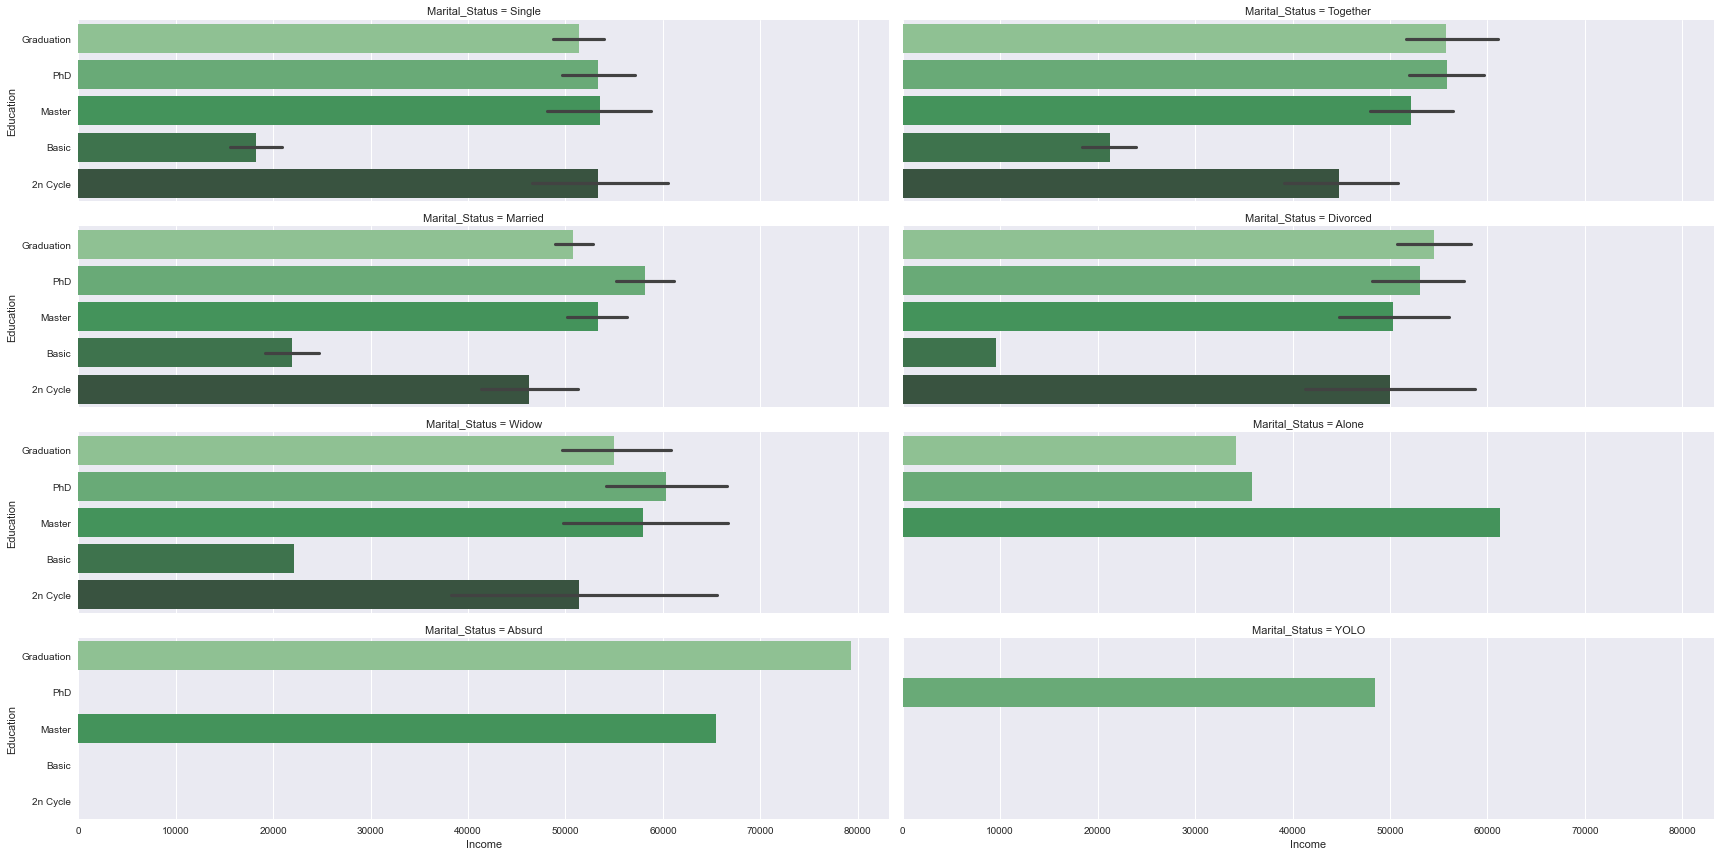

In [22]:
g = sns.catplot(x='Income', y='Education', col='Marital_Status', col_wrap=2, height=3, aspect=4,
                kind='bar', data=data, palette='Greens_d')

Among the single people, customers with PhD or masters degree have the highest income. Among the together or married people, customers with PhD have the highest income and among the widowed customers too, people with PhD have highest income.

______________

### Relation between Age, kids and teens at home per marital status

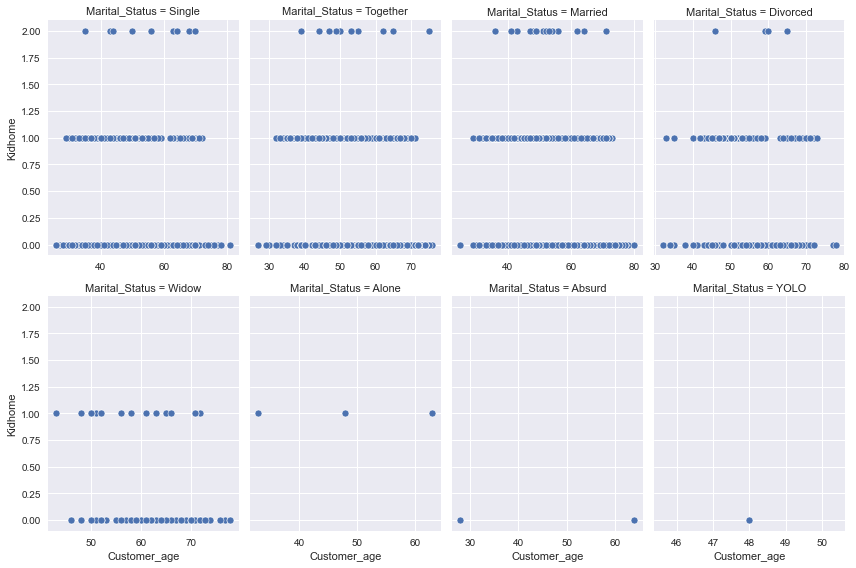

In [23]:
sns.relplot(
    data=data,
    x='Customer_age', y='Kidhome',
    col='Marital_Status', col_wrap=4,
    height=4, aspect=0.75, facet_kws=dict(sharex=False),sizes=(10, 200)
)

Most people having two kids are married and customers who are divorced or widowed have atleast one kid at home.

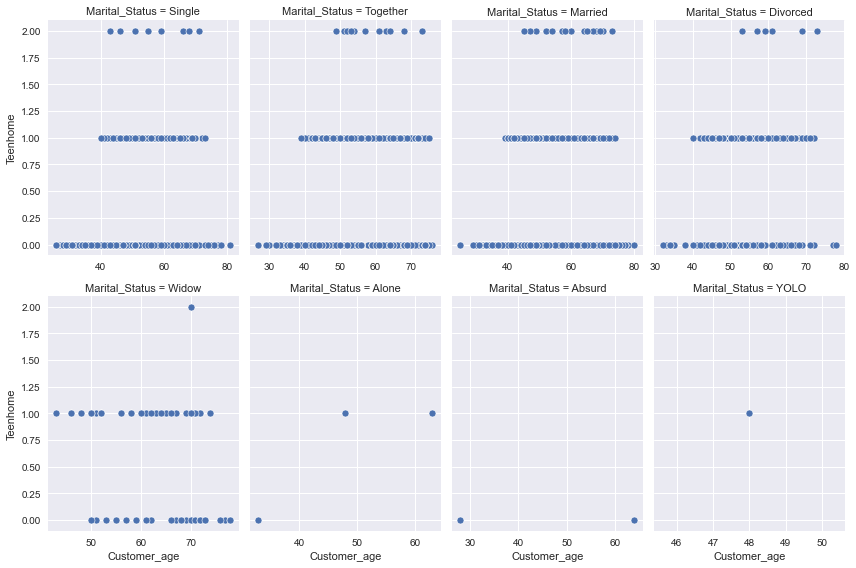

In [24]:
sns.relplot(
    data=data,
    x='Customer_age', y='Teenhome',
    col='Marital_Status', col_wrap=4,
    height=4, aspect=0.75, facet_kws=dict(sharex=False),sizes=(10, 200)
)

Most people having two teens are married and customers who are divorced or widowed have atleast one teen at home.  

___________________________________

Grouping income into groups : 0-10,000 | 10,000-20,000 | 20,000-30,000 | 30,000-40,000 | 40,000-50,000 | 50,000-60,000 | '60,000-70,000' | '70,000-80,000' | '80,000-90,000' | '90,000-100,000' | '100,000-200,000' | '200,000-300,000' | '300,000-400,000' | '400,000-500,000' | '500,000-600,000' | '600,000-700,000'

In [25]:
conditions = [
    (data['Income']>=0) & (data['Income']<=10000),
    (data['Income']>10000) & (data['Income']<=20000),
    (data['Income']>20000) & (data['Income']<=30000),
    (data['Income']>30000) & (data['Income']<=40000),
    (data['Income']>40000) & (data['Income']<=50000),
    (data['Income']>50000) & (data['Income']<=60000),
    (data['Income']>60000) & (data['Income']<=70000),
    (data['Income']>70000) & (data['Income']<=80000),
    (data['Income']>80000) & (data['Income']<=90000),
    (data['Income']>90000) & (data['Income']<=100000),
    (data['Income']>100000) & (data['Income']<=200000),
    (data['Income']>200000) & (data['Income']<=300000),
    (data['Income']>300000) & (data['Income']<=400000),
    (data['Income']>400000) & (data['Income']<=500000),
    (data['Income']>500000) & (data['Income']<=600000),
    (data['Income']>600000) & (data['Income']<=700000)
    ]

values = ['0-10000', '10,000-20,000', '20,000-30,000', '30,000-40,000', '40,000-50,000', '50,000-60,000', '60,000-70,000',
          '70,000-80,000', '80,000-90,000', '90,000-100,000', '100,000-200,000', '200,000-300,000', '300,000-400,000',
          '400,000-500,000', '500,000-600,000', '600,000-700,000']

In [26]:
data['Income_grp'] = np.select(conditions, values)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_age,Income_grp
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,1,64,"50,000-60,000"
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,0,67,"40,000-50,000"
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,56,"70,000-80,000"
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,0,37,"20,000-30,000"
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,40,"50,000-60,000"


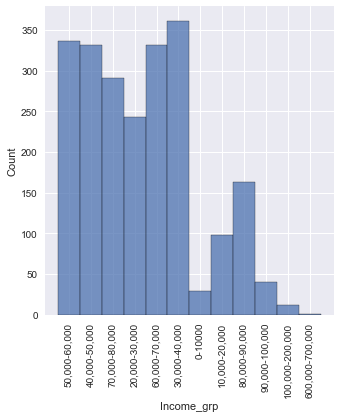

In [27]:
sns.displot(data['Income_grp'])
plt.xticks(rotation=90)
plt.show()

Most of the customers belong to 30,000 to 40,000 and 50,000-60,000 income group

In [28]:
data_wines = data[['Income', 'MntWines']]
data_wines['Product_Category'] = 'Wines'
data_wines.rename(columns={'MntWines':'MntAmount'}, inplace=True)

data_fruits = data[['Income', 'MntFruits']]
data_fruits['Product_Category'] = 'Fruits'
data_fruits.rename(columns={'MntFruits':'MntAmount'}, inplace=True)

data_MeatProducts = data[['Income', 'MntMeatProducts']]
data_MeatProducts['Product_Category'] = 'MeatProducts'
data_MeatProducts.rename(columns={'MntMeatProducts':'MntAmount'}, inplace=True)

data_FishProducts = data[['Income', 'MntFishProducts']]
data_FishProducts['Product_Category'] = 'FishProducts'
data_FishProducts.rename(columns={'MntFishProducts':'MntAmount'}, inplace=True)

data_SweetProducts = data[['Income', 'MntSweetProducts']]
data_SweetProducts['Product_Category'] = 'SweetProducts'
data_SweetProducts.rename(columns={'MntSweetProducts':'MntAmount'}, inplace=True)

data_GoldProds = data[['Income', 'MntGoldProds']]
data_GoldProds['Product_Category'] = 'GoldProds'
data_GoldProds.rename(columns={'MntGoldProds':'MntAmount'}, inplace=True)

In [29]:
data_sub = pd.concat([data_wines, data_fruits, data_MeatProducts, data_FishProducts, data_SweetProducts, data_GoldProds], axis=0)

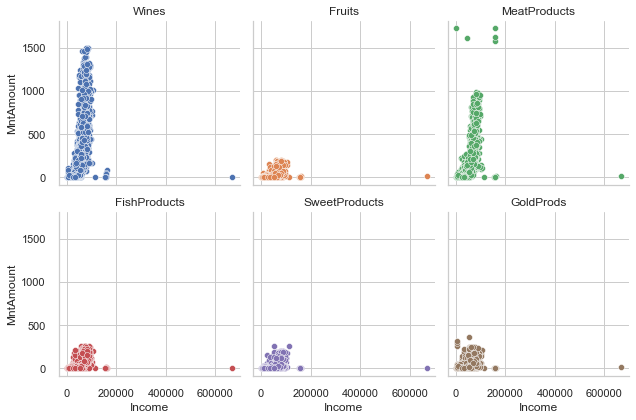

In [30]:
sns.set(style="whitegrid")

g = sns.FacetGrid(data_sub, col='Product_Category', hue='Product_Category', col_wrap=3)
#g = g.map(sns.kdeplot,'MntAmount', cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g = g.map(sns.scatterplot, 'Income', 'MntAmount')
g = g.set_titles("{col_name}")

plt.show()

Customers tend to spend more on wines and meat products.

Calculating amount spend on products per income group in the last two years

In [31]:
pivot_spend_per_income = data.pivot_table(index='Income_grp', 
                                          values=['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                                          aggfunc=np.median)
pivot_spend_per_income.reset_index(inplace=True)
pivot_spend_per_income

,Income_grp,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
0,0-10000,4,3.0,12.0,10.0,3.0,5
1,"10,000-20,000",6,3.0,11.5,9.0,4.0,6
2,"100,000-200,000",2,2.0,3.5,103.0,2.5,47
3,"20,000-30,000",4,3.0,9.0,11.0,3.0,9
4,"30,000-40,000",3,2.0,10.0,16.0,2.0,26
5,"40,000-50,000",4,3.0,19.0,38.0,3.0,95
6,"50,000-60,000",10,7.0,30.0,74.0,7.0,267
7,"60,000-70,000",34,26.0,48.0,182.5,25.5,496
8,"600,000-700,000",8,14.0,12.0,18.0,1.0,9
9,"70,000-80,000",73,44.0,54.0,348.0,44.0,565


<AxesSubplot:ylabel='Density'>

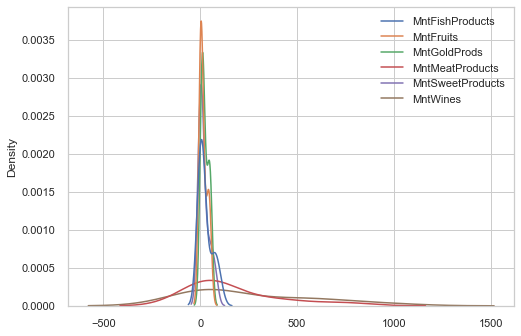

In [32]:
sns.kdeplot(data=pivot_spend_per_income)

calculate the mode of all the acceptedcmp column grouped by income grp 

In [33]:
data_grp1 = pd.DataFrame(data.groupby('Income_grp')['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'].apply(lambda x: x.mode())).reset_index()
data_grp1

,Income_grp,level_1,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0-10000,0,0,0,0,0,0,0
1,"10,000-20,000",0,0,0,0,0,0,0
2,"100,000-200,000",0,0,0,0,0,0,0
3,"20,000-30,000",0,0,0,0,0,0,0
4,"30,000-40,000",0,0,0,0,0,0,0
5,"40,000-50,000",0,0,0,0,0,0,0
6,"50,000-60,000",0,0,0,0,0,0,0
7,"60,000-70,000",0,0,0,0,0,0,0
8,"600,000-700,000",0,0,0,0,0,0,0
9,"70,000-80,000",0,0,0,0,0,0,0


Most of the customers have not accepted the offer in any of the campaign. Customers who have incomes in the range of 90,000-100,000 seem to have accepted the offer in the 5th or last campaign.

In [34]:
data_grp1.drop('level_1', axis=1, inplace=True)

In [35]:
data_grp2 = pd.DataFrame(data.groupby('Income_grp')['Marital_Status', 'Kidhome', 'Teenhome'].apply(lambda x: x.mode())).reset_index()
data_grp2

,Income_grp,level_1,Marital_Status,Kidhome,Teenhome
0,0-10000,0,Married,1,0
1,"10,000-20,000",0,Married,1,0
2,"100,000-200,000",0,Together,0,0
3,"20,000-30,000",0,Married,1,0
4,"30,000-40,000",0,Married,1,0
5,"40,000-50,000",0,Married,1,1
6,"50,000-60,000",0,Married,0,1
7,"60,000-70,000",0,Married,0,1
8,"600,000-700,000",0,Together,1,0
9,"70,000-80,000",0,Married,0,0


In [36]:
data_grp2.drop('level_1', axis=1, inplace=True)

Under most of the income groups, majority of the customers are married and seem to have atleast 1 kid at home.

Combining grouped tables

In [37]:
data_grp1.merge(data_grp2)

,Income_grp,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Marital_Status,Kidhome,Teenhome
0,0-10000,0,0,0,0,0,0,Married,1,0
1,"10,000-20,000",0,0,0,0,0,0,Married,1,0
2,"100,000-200,000",0,0,0,0,0,0,Together,0,0
3,"20,000-30,000",0,0,0,0,0,0,Married,1,0
4,"30,000-40,000",0,0,0,0,0,0,Married,1,0
5,"40,000-50,000",0,0,0,0,0,0,Married,1,1
6,"50,000-60,000",0,0,0,0,0,0,Married,0,1
7,"60,000-70,000",0,0,0,0,0,0,Married,0,1
8,"600,000-700,000",0,0,0,0,0,0,Together,1,0
9,"70,000-80,000",0,0,0,0,0,0,Married,0,0


In [38]:
data_grouped = pivot_spend_per_income.merge(data_grp1.merge(data_grp2))

In [39]:
data_grouped

,Income_grp,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Marital_Status,Kidhome,Teenhome
0,0-10000,4,3.0,12.0,10.0,3.0,5,0,0,0,0,0,0,Married,1,0
1,"10,000-20,000",6,3.0,11.5,9.0,4.0,6,0,0,0,0,0,0,Married,1,0
2,"100,000-200,000",2,2.0,3.5,103.0,2.5,47,0,0,0,0,0,0,Together,0,0
3,"20,000-30,000",4,3.0,9.0,11.0,3.0,9,0,0,0,0,0,0,Married,1,0
4,"30,000-40,000",3,2.0,10.0,16.0,2.0,26,0,0,0,0,0,0,Married,1,0
5,"40,000-50,000",4,3.0,19.0,38.0,3.0,95,0,0,0,0,0,0,Married,1,1
6,"50,000-60,000",10,7.0,30.0,74.0,7.0,267,0,0,0,0,0,0,Married,0,1
7,"60,000-70,000",34,26.0,48.0,182.5,25.5,496,0,0,0,0,0,0,Married,0,1
8,"600,000-700,000",8,14.0,12.0,18.0,1.0,9,0,0,0,0,0,0,Together,1,0
9,"70,000-80,000",73,44.0,54.0,348.0,44.0,565,0,0,0,0,0,0,Married,0,0


Customers belonging to the income group 90,000-100,000 tend to have spent maximum for majority of the products.This income group also has majority of customers who accepted the offer in 5th or last campaign and they are mostly single with no kids or teens.

__________

Calculating the years with the company for the customers and studying the customers who have been with the company for the longest time.

In [40]:
from datetime import date
todays_date = date.today()
data['Years_with_company'] = todays_date.year - pd.DatetimeIndex(data['Dt_Customer']).year
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_age,Income_grp,Years_with_company
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,1,64,"50,000-60,000",9
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,0,67,"40,000-50,000",7
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,56,"70,000-80,000",8
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,0,37,"20,000-30,000",7
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,40,"50,000-60,000",7


In [41]:
print('Maximum number of years with the company : ', data['Years_with_company'].max())

Maximum number of years with the company :  9


Extracting customers who have been with the company for 9 years

In [42]:
data_sub_9_years = data[data['Years_with_company']==9]
data_sub_9_years.shape

(494, 29)

There are 494 customers who have been with the comapny for the longest

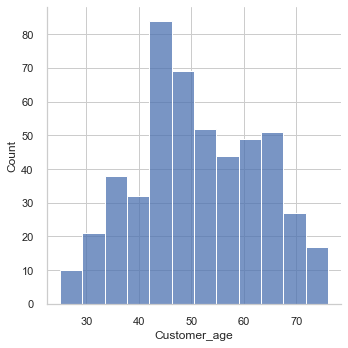

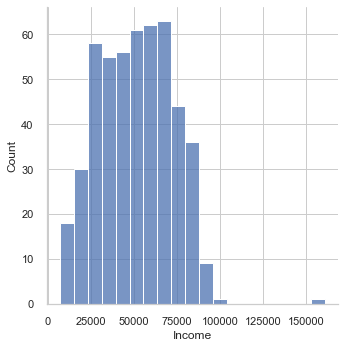

In [43]:
sns.displot(data_sub_9_years['Customer_age'])
sns.displot(data_sub_9_years['Income'])

In [44]:
print('Amount spent on wines : ', data_sub_9_years['MntWines'].median())
print('Amount spent on fruits: ', data_sub_9_years['MntFruits'].median())
print('Amount spent on  fish products: ', data_sub_9_years['MntFishProducts'].median())
print('Amount spent on meat products : ', data_sub_9_years['MntMeatProducts'].median())
print('Amount spent on sweet products : ', data_sub_9_years['MntSweetProducts'].median())
print('Amount spent on gold products : ', data_sub_9_years['MntGoldProds'].median())

Amount spent on wines :  268.0
Amount spent on fruits:  12.0
Amount spent on  fish products:  16.0
Amount spent on meat products :  102.5
Amount spent on sweet products :  12.0
Amount spent on gold products :  34.0


The customers who have been the longest with company have spent the maximun on wines and meat products

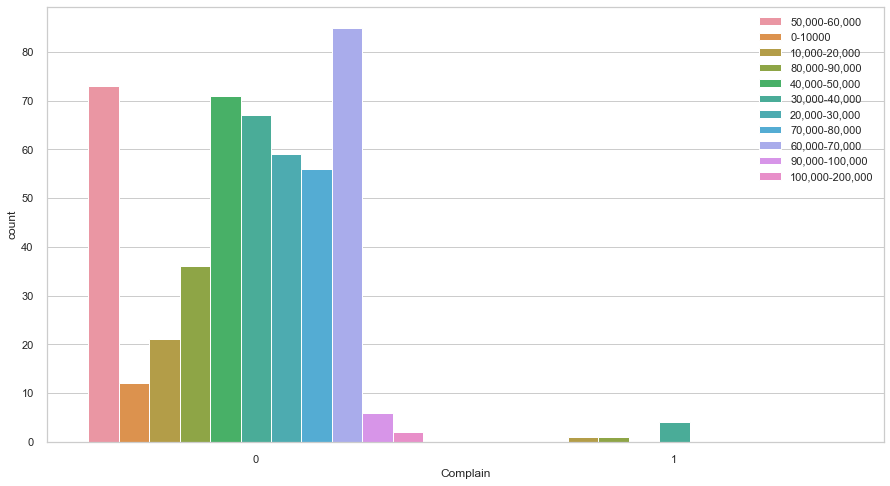

In [47]:
plt.figure(figsize=[15,8])
sns.countplot(x='Complain', data=data_sub_9_years, hue='Income_grp')
plt.legend(loc='upper right')

Very few customers among the people who have been the longest with the company had complained in the last two years and they belong to the income group 20,000-30,000.

______________

### Relation between recency and years with the company

<AxesSubplot:xlabel='Years_with_company', ylabel='Recency'>

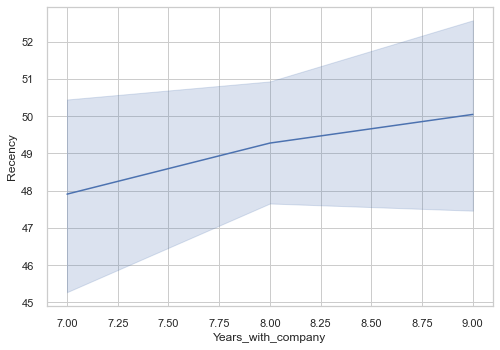

In [48]:
sns.lineplot(x='Years_with_company', y='Recency', data=data)

The more recent the customer is the more recent he has purchases

<AxesSubplot:xlabel='Recency', ylabel='Density'>

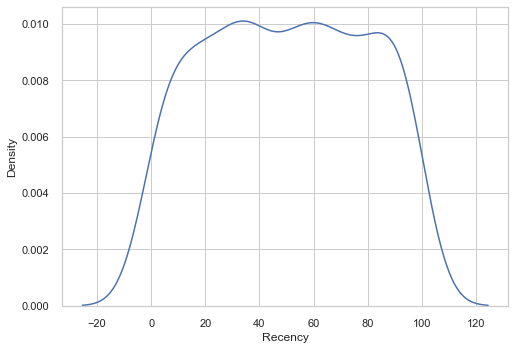

In [49]:
sns.kdeplot(data_sub_9_years['Recency'])

Among the customers who have been the longest with the company the last purchase was 40-60 days ago

____________________

Extract customers who accepted the offer in the first campaign

In [50]:
data_AcceptedCmp1 = data[data['AcceptedCmp1']==1]
data_AcceptedCmp1.shape

(144, 29)

There are 144 customers who accepted the offer in the first campaign

Looking at the age and income distributions for these customers

<AxesSubplot:xlabel='Customer_age', ylabel='Density'>

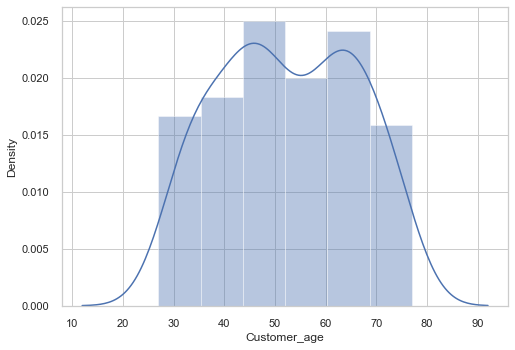

In [51]:
sns.distplot(data_AcceptedCmp1['Customer_age'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

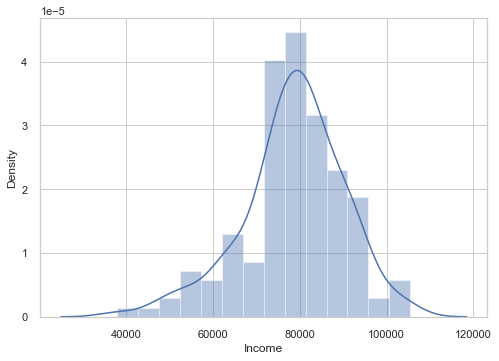

In [52]:
sns.distplot(data_AcceptedCmp1['Income'])

Majority of customers belong to 45-50 and 60-65 age groups and majority of the customers have income around 80,000

In [53]:
print('Amount spent on wines : ', data_AcceptedCmp1['MntWines'].median())
print('Amount spent on fruits: ', data_AcceptedCmp1['MntFruits'].median())
print('Amount spent on  fish products: ', data_AcceptedCmp1['MntFishProducts'].median())
print('Amount spent on meat products : ', data_AcceptedCmp1['MntMeatProducts'].median())
print('Amount spent on sweet products : ', data_AcceptedCmp1['MntSweetProducts'].median())
print('Amount spent on gold products : ', data_AcceptedCmp1['MntGoldProds'].median())

Amount spent on wines :  761.5
Amount spent on fruits:  29.5
Amount spent on  fish products:  76.0
Amount spent on meat products :  437.5
Amount spent on sweet products :  46.5
Amount spent on gold products :  49.5


These customers have spent maximum on wines and meat products

<AxesSubplot:xlabel='Recency', ylabel='Count'>

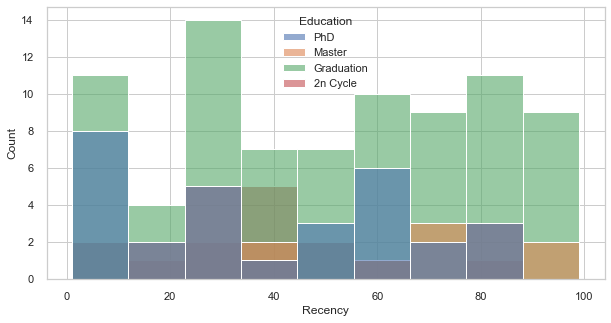

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_AcceptedCmp1, x='Recency', hue='Education', fill=True, common_norm=False, alpha=0.6, legend=True)

Customers having 2nd Cycle education have purchased very recently

___________________________

Studying the customers who accepted the campaign in the last offer

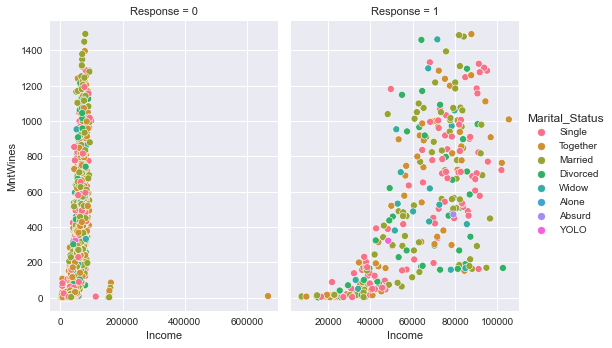

In [55]:
plt.style.use("seaborn")

sns.relplot(
    data=data,
    x='Income', y='MntWines',
    hue='Marital_Status', col='Response',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

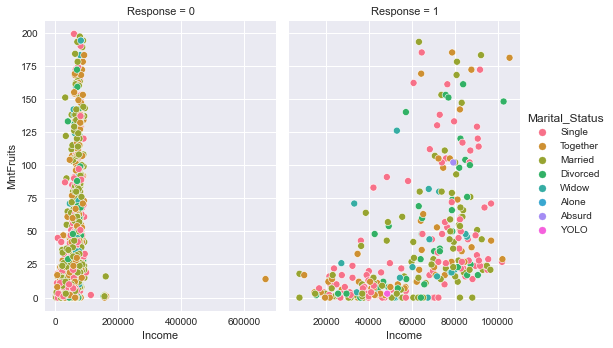

In [56]:
plt.style.use("seaborn")

sns.relplot(
    data=data,
    x='Income', y='MntFruits',
    hue='Marital_Status', col='Response',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

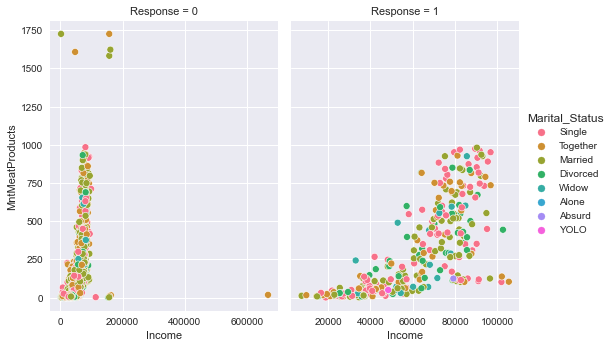

In [57]:
plt.style.use("seaborn")

sns.relplot(
    data=data,
    x='Income', y='MntMeatProducts',
    hue='Marital_Status', col='Response',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

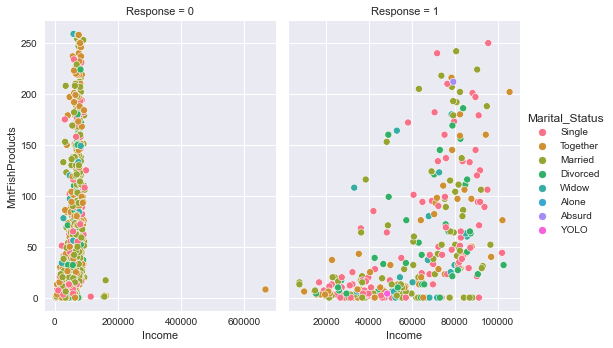

In [58]:
plt.style.use("seaborn")

sns.relplot(
    data=data,
    x='Income', y='MntFishProducts',
    hue='Marital_Status', col='Response',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

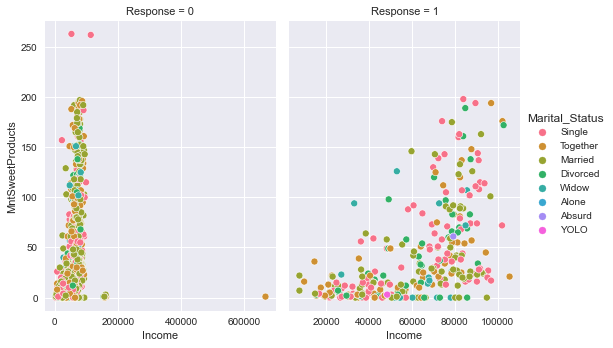

In [59]:
plt.style.use("seaborn")

sns.relplot(
    data=data,
    x='Income', y='MntSweetProducts',
    hue='Marital_Status', col='Response',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

The customers who had accepted the offer in the last campaign seem to be spread across all income groups and more towards the higher income group.

__________________

Studying the customers who complained in the last two years:

In [60]:
data[data['Complain']==1].shape

(20, 29)

There were very few customers who have complained in the last two years from the given data

<AxesSubplot:xlabel='Income_grp', ylabel='Customer_age'>

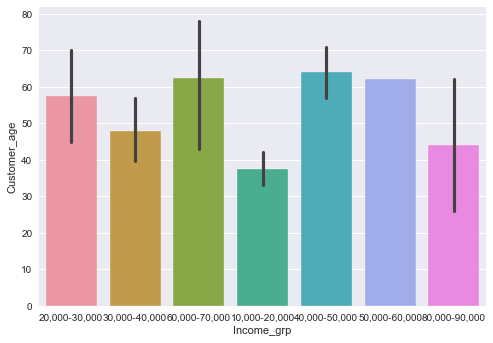

In [61]:
sns.barplot(x='Income_grp', y='Customer_age', data=data[data['Complain']==1])

Most of the customers who complained have income 40,000-50,000 and 60,000-70,000 and are around 60 years of age

<AxesSubplot:xlabel='Recency', ylabel='Count'>

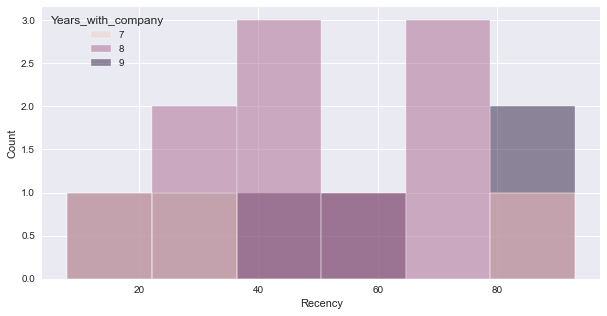

In [64]:
plt.figure(figsize=(10,5))
sns.histplot(data=data[data['Complain']==1], x='Recency', hue='Years_with_company', fill=True, legend=True)

Among the customers who complained, majority who purchased before 40 or 60 days, are not among the oldest customers.

In [65]:
print('Amount spent on wines : ', data[data['Complain']==1]['MntWines'].median())
print('Amount spent on fruits: ', data[data['Complain']==1]['MntFruits'].median())
print('Amount spent on  fish products: ', data[data['Complain']==1]['MntFishProducts'].median())
print('Amount spent on meat products : ', data[data['Complain']==1]['MntMeatProducts'].median())
print('Amount spent on sweet products : ', data[data['Complain']==1]['MntSweetProducts'].median())
print('Amount spent on gold products : ', data[data['Complain']==1]['MntGoldProds'].median())

Amount spent on wines :  34.0
Amount spent on fruits:  6.0
Amount spent on  fish products:  6.5
Amount spent on meat products :  32.5
Amount spent on sweet products :  4.5
Amount spent on gold products :  13.5


Like any other grouped customers, these customers also seems to have been spending more on wines and meat products

In [66]:
pivot_purchases_per_income = data.pivot_table(index='Income_grp', 
                                               values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                                               aggfunc=np.median)
pivot_purchases_per_income.reset_index(inplace=True)
pivot_purchases_per_income

,Income_grp,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
0,0-10000,0,3,2,2.0
1,"10,000-20,000",0,2,3,2.0
2,"100,000-200,000",8,0,1,0.5
3,"20,000-30,000",0,2,3,2.0
4,"30,000-40,000",0,2,3,2.0
5,"40,000-50,000",1,2,4,3.0
6,"50,000-60,000",2,3,6,5.0
7,"60,000-70,000",4,2,8,6.0
8,"600,000-700,000",1,4,3,3.0
9,"70,000-80,000",5,1,8,5.0


Number of catalog purchases is maximum among the customers having income between 100,000-200,000. Number of deal purchases is maximum for those among 50,000-60,000 and 0-10,000 income. Number of store purchases is maximum for those among 80,000-90,000 income. Number of web purchases is maximum for those among 60,000-70,000 income. 

_______________________________

Relation between numwebvisitsmonth and numwebpurchases

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

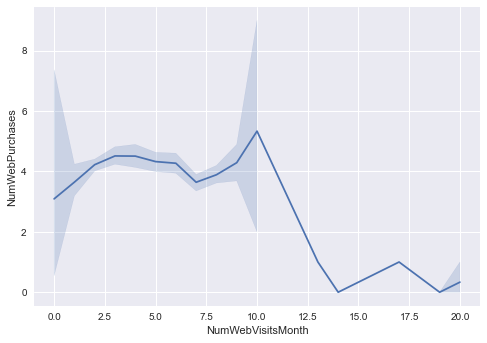

In [67]:
sns.lineplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)

No relation between the num of visits per month and web purchases

_______________

Extract year month day and weekday from the date enrolled and find the date when maximum number of people last purchased

In [69]:
data['date_customer_last_purchased'] = pd.to_datetime(todays_date, infer_datetime_format=True) -  pd.to_timedelta(data['Recency'], unit='d')
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_age,Income_grp,Years_with_company,date_customer_last_purchased
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,64,"50,000-60,000",9,2021-10-15
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,67,"40,000-50,000",7,2021-11-04
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,56,"70,000-80,000",8,2021-11-16
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,37,"20,000-30,000",7,2021-11-16
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,40,"50,000-60,000",7,2021-09-09


In [70]:
data['Dt_Customer_weekday'] = pd.DatetimeIndex(data['Dt_Customer']).weekday
data['Dt_Customer_day'] = pd.DatetimeIndex(data['Dt_Customer']).day
data['Dt_Customer_month'] = pd.DatetimeIndex(data['Dt_Customer']).month
data['Dt_Customer_year'] = pd.DatetimeIndex(data['Dt_Customer']).year

In [71]:
data['date_customer_last_purchased_weekday'] = pd.DatetimeIndex(data['date_customer_last_purchased']).weekday
data['date_customer_last_purchased_day'] = pd.DatetimeIndex(data['date_customer_last_purchased']).day
data['date_customer_last_purchased_month'] = pd.DatetimeIndex(data['date_customer_last_purchased']).month
data['date_customer_last_purchased_year'] = pd.DatetimeIndex(data['date_customer_last_purchased']).year

<AxesSubplot:xlabel='Dt_Customer_weekday', ylabel='count'>

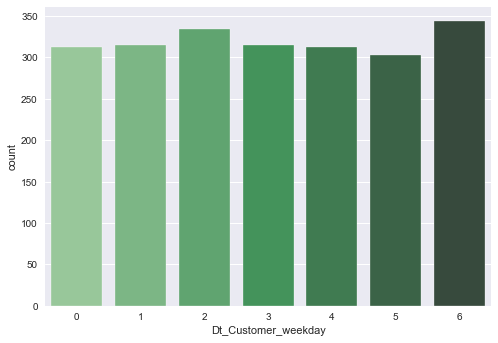

In [77]:
sns.countplot(x='Dt_Customer_weekday', data=data, palette='Greens_d')

More number of customers had enrolled towards the weekend

<AxesSubplot:xlabel='Dt_Customer_day', ylabel='count'>

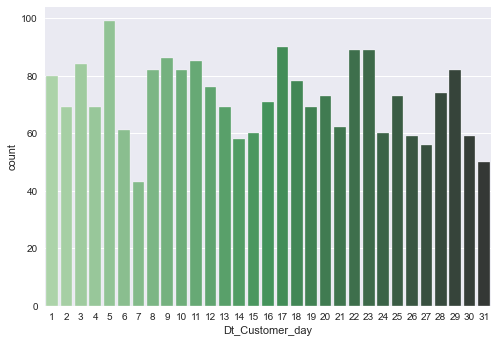

In [78]:
sns.countplot(x='Dt_Customer_day', data=data, palette='Greens_d')

More number of customers had enrolled towards the start of the month

<AxesSubplot:xlabel='Dt_Customer_month', ylabel='count'>

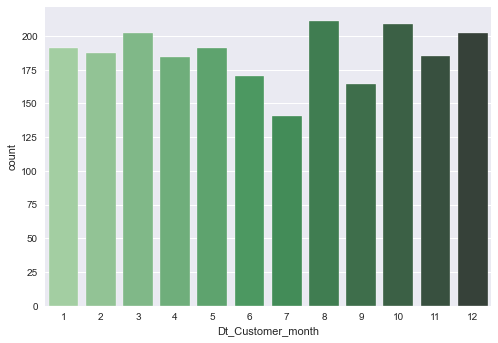

In [79]:
sns.countplot(x='Dt_Customer_month', data=data, palette='Greens_d')

Most customers enrolled in the month of August and October

<AxesSubplot:xlabel='Dt_Customer_year', ylabel='count'>

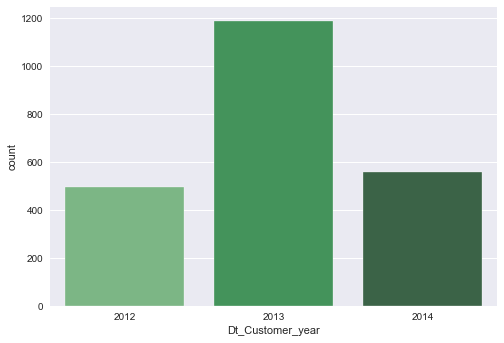

In [80]:
sns.countplot(x='Dt_Customer_year', data=data, palette='Greens_d')

<AxesSubplot:xlabel='date_customer_last_purchased_weekday', ylabel='count'>

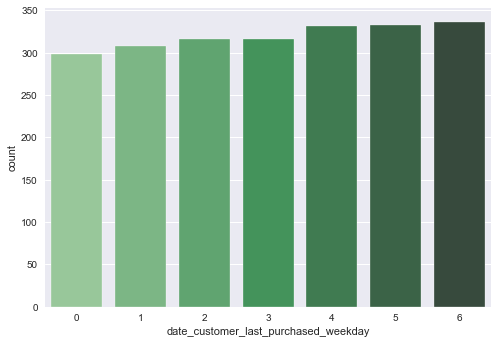

In [81]:
sns.countplot(x='date_customer_last_purchased_weekday', data=data, palette='Greens_d')

The last purchase day for most of the customers was towarsd the weekend

<AxesSubplot:xlabel='date_customer_last_purchased_day', ylabel='count'>

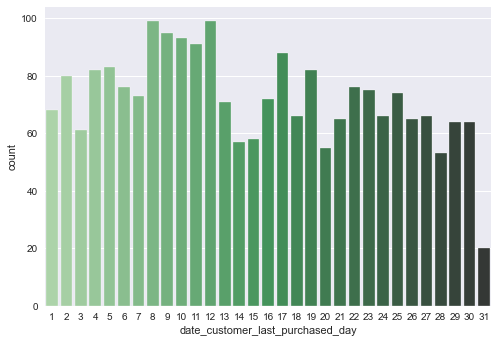

In [82]:
sns.countplot(x='date_customer_last_purchased_day', data=data, palette='Greens_d')

very few people had last purchased during the month end

<AxesSubplot:xlabel='date_customer_last_purchased_month', ylabel='count'>

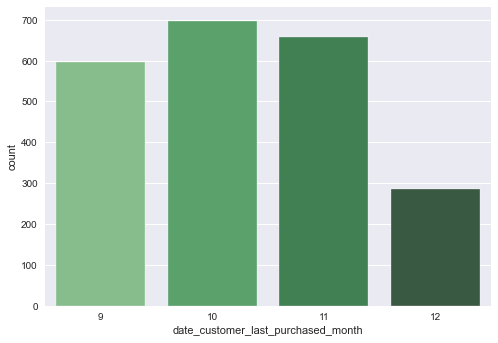

In [83]:
sns.countplot(x='date_customer_last_purchased_month', data=data, palette='Greens_d')

For most of the customers, the last purchased date was october. During this month a lot of customers had enrolled too.